<a href="https://colab.research.google.com/github/lukeolson/mse598dm-python-data/blob/main/collecting-organizing-analyzing-basics/collecting-organizing-analyzing-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.fueleconomy.gov/feg/label/images/gaslabel.jpg" width="600px;" alt="gas prices"/>

In [ ]:
# Answer Three things I learned from this example:
# 1. how to bring the file from external sources to the code block here
# 2. how to convert the value to certain type
# 3. how to crop and filter the data

#   **TOPIC**:  Collecting, organizing, and analyzing data

## Objectives

### Objectives

1. Identify the pieces of a Pandas dataframe for a set of data.
2. Interpret data through plotting.
3. Apply data filtering techniques to prepare the data for analysis.
4. Organize multiple data sets for analysis.
5. Construct a comparison between two sets of data.

### Questions To Ask

1. What are the column types in your dataframe?
2. How do you plot a column of data?
3. Which data needs to be modified in your dataframe?
4. How do you plot two time series?
5. How would you correlate two series of data?

### What to hand in
1. An attempt at last portion "Your turn..."
2. Answer "Three things I learned from this example..."
    1. how to bring the file from external sources to the code block here
    2. how to convert the value to certain type
    3. how to crop and filter the data

## Highlevel topics

- Data importing and storage
- Data cleaning
- Data plotting
- Plot manipulation
- Data analysis using built-in tools

## Synopsis

You are a data scientist working for a DC think tank, and your team is studying technology and energy policy.  To prepare for an upcoming energy sumit you are studying the relationship between **US fuel prices** and **fuel efficiency**, measured in miles-per-gallon.

#### Your Task

Your goal is to identify trends in two different datasets on **US fuel prices** and **fuel efficiency**.

## Datasets

In this session two datasets will be used:
- Automotive Trends Report
    - This dataset provides **miles per gallon** on light-duty vehicles
    - https://www.epa.gov/automotive-trends/explore-automotive-trends-data
    - https://www.epa.gov/automotive-trends/about-automotive-trends-data
    - downloaded as `table_export.csv`
- Retail motor gasoline and on-highway diesel fuel prices
    - This dataset provides **fuel prices**
    - https://www.eia.gov/totalenergy/data/browser/index.php?tbl=T09.04#/
    - (section 9.4) https://www.eia.gov/totalenergy/data/monthly/index.php
    - downlloaded as `MER_T09_04.csv`

Example
```
wget https://www.eia.gov/totalenergy/data/browser/csv.php\?tbl\=T09.04 -O T09_04.csv
```

In [9]:
!wget https://raw.githubusercontent.com/lukeolson/mse598dm-python-data/main/collecting-organizing-analyzing-basics/data/MER_T09_04.csv
!wget https://raw.githubusercontent.com/lukeolson/mse598dm-python-data/main/collecting-organizing-analyzing-basics/data/table_export.csv
!ls -lh

--2025-02-05 01:08:00--  https://raw.githubusercontent.com/lukeolson/mse598dm-python-data/main/collecting-organizing-analyzing-basics/data/MER_T09_04.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 718967 (702K) [text/plain]
Saving to: ‘MER_T09_04.csv’

MER_T09_04.csv      100%[===================>] 702.12K  --.-KB/s    in 0.01s   

2025-02-05 01:08:00 (47.8 MB/s) - ‘MER_T09_04.csv’ saved [718967/718967]

--2025-02-05 01:08:00--  https://raw.githubusercontent.com/lukeolson/mse598dm-python-data/main/collecting-organizing-analyzing-basics/data/table_export.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.1

## 0. Getting Started

### Setting up Python

First, import a few Python packages that we'll use throught the course.  By convention these are abbreviated on import.

- `matplotlib` and the interface `matplotlib.pyplot` for plotting
- `numpy` for numerical functions and arrays
- `pandas` for data structures and analysis
- `seaborn` for additional plotting and improved figures

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

%matplotlib inline

### Import data

Here we will import the data with Pandas `read_csv` function and store as a *dataframe*.  

What is a *dataframe*?  It's a storage container (provided by Pandas) that functions like a table.  It can also be viewed as a dictionary.  Pandas dataframes have lots of useful functions, many of which we won't use in this lesson (see [Pandas dataframe documenation](http://pandas.pydata.org/pandas-docs/stable/reference/frame.html) for more details).

In [11]:
ecodf = pd.read_csv('table_export.csv')

### Example dataframe

Let's construct a mock dataframe to highlight some basic functionality.

In [13]:
mydf = pd.DataFrame(
    {'month': ['January', 'February', 'March'],
     'temperature': [20, 30, 40],
     'snowfall': [12.5, 15, 'trace']
    }
)

We can inspect the dataframe in a few different ways:

- `mydf.info()` shows a highlevel view of the dataframe as a data structure
- `mydf` or `print(mydf)` will give a tabular view

In [14]:
mydf

,month,temperature,snowfall
0,January,20,12.5
1,February,30,15
2,March,40,trace


In [15]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        3 non-null      object
 1   temperature  3 non-null      int64 
 2   snowfall     3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


In [16]:
mydf

,month,temperature,snowfall
0,January,20,12.5
1,February,30,15
2,March,40,trace


We can access a given column of a dataframe using the bracket notation with the column label.

In [17]:
mydf['temperature']

,temperature
0,20
1,30
2,40


Also notice that each column is a Pandas *series*.  A series is simply array of values with an index to those values.

In [18]:
type(mydf['temperature'])

pandas.core.series.Series

#### Pandas methods

In the following we'll be doing mainly three things to data stored like `mydf`:

1. formatting the data
2. setting an index
3. cleaning the data

We'll work with the example dataframe for now.  Later, we'll work with the datasets described above and we'll also merge data and introduce some analytics.

In [19]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        3 non-null      object
 1   temperature  3 non-null      int64 
 2   snowfall     3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


#### (1)
Let's *format* the data so that the `month` is an actual datetime format.  We can do this using [`pd.to_datetime()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html).
For this we need to refer to the string format of dates in Python's `time` format:
https://docs.python.org/3/library/time.html#time.strftime

Notice that `%B` means the month name.

In [20]:
mydf['month']

,month
0,January
1,February
2,March


In [82]:
pd.to_datetime('2019 January', format='%Y %B')

Timestamp('2019-01-01 00:00:00')

In [22]:
pd.to_datetime(mydf['month'], format='%B')

,month
0,1900-01-01
1,1900-02-01
2,1900-03-01


Notice, the above command doesn't  actually change the column of our dataframe `mydf`.

In [23]:
mydf['month']

,month
0,January
1,February
2,March


To add a year, we would use `%Y`.  To change our dataframe, we set the column equal to the new series.

In [24]:
mydf['month'] = pd.to_datetime(mydf['month']+'2019', format='%B%Y')

In [25]:
mydf

,month,temperature,snowfall
0,2019-01-01,20,12.5
1,2019-02-01,30,15
2,2019-03-01,40,trace


In [26]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   month        3 non-null      datetime64[ns]
 1   temperature  3 non-null      int64         
 2   snowfall     3 non-null      object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 204.0+ bytes


#### (2)

Each column of a Pandas dataframe is a series and the default is to index this series with integer indices starting at 0.  We can see what the current index values are by accessing the dataframe's `index` attribute (not a function).  We can also set the index to another set of labels, say the months using the dataframe's `set_index()` function.

In [27]:
mydf.index

RangeIndex(start=0, stop=3, step=1)

In [28]:
mydf.set_index('month', inplace=True)

Notice we used `inplace=True` above so it modified `mydf` instead of making a new object.  We can look at the modified index and dataframe:

In [29]:
mydf.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01'], dtype='datetime64[ns]', name='month', freq=None)

In [30]:
mydf

,temperature,snowfall
month,,
2019-01-01,20,12.5
2019-02-01,30,15
2019-03-01,40,trace


#### (3)

Notice that the last value of snowfall is "trace" (a small amount of snow, but no measurable accumulation).  Unfortunately, this isn't very helpful -- we cannot take the average (or many of the other summary statistics) of a string.

In [32]:
mydf['snowfall'].mean()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

Since "trace" means a small amount, it's fairly reasonable to represent it as 0.  So we're going to construct a function that we can `apply()` to each entry.  Let's check to see if the entry is "trace" and if so, set it to 0.0.

In [33]:
def f(x):
    if x == 'trace':
        return 0.0
    else:
        return x

mydf['snowfall'] = mydf['snowfall'].apply(f)
mydf

,temperature,snowfall
month,,
2019-01-01,20,12.5
2019-02-01,30,15.0
2019-03-01,40,0.0


Now that "trace" is removed, we can take the average.

In [34]:
mydf['snowfall'].mean()

9.166666666666666

## 1. The fuel economy dataset

Using the practice from the `mydf` example, let's take a look at the `ecodf` dataframe we obtained above from importing the fuel economy dataset.

In [35]:
ecodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Model Year                  400 non-null    object 
 1   Regulatory Class            400 non-null    object 
 2   Vehicle Type                400 non-null    object 
 3   Production Share            400 non-null    object 
 4   Real-World MPG              400 non-null    float64
 5   Real-World MPG_City         400 non-null    float64
 6   Real-World MPG_Hwy          400 non-null    float64
 7   Real-World CO2 (g/mi)       400 non-null    float64
 8   Real-World CO2_City (g/mi)  400 non-null    float64
 9   Real-World CO2_Hwy (g/mi)   400 non-null    float64
 10  Weight (lbs)                400 non-null    float64
 11  Horsepower (HP)             400 non-null    float64
 12  Footprint (sq. ft.)         400 non-null    object 
dtypes: float64(8), object(5)
memory usa

In [36]:
ecodf

,Model Year,Regulatory Class,Vehicle Type,Production Share,Real-World MPG,Real-World MPG_City,Real-World MPG_Hwy,Real-World CO2 (g/mi),Real-World CO2_City (g/mi),Real-World CO2_Hwy (g/mi),Weight (lbs),Horsepower (HP),Footprint (sq. ft.)
0,1975,All,All,1.000000,13.05970,12.01552,14.61167,680.59612,739.73800,608.31160,4060.399,137.3346,-
1,1975,Car,All Car,0.806646,13.45483,12.31413,15.17266,660.63740,721.82935,585.84724,4057.494,136.1964,-
2,1975,Car,Sedan/Wagon,0.805645,13.45833,12.31742,15.17643,660.46603,721.63673,585.70185,4057.565,136.2256,-
3,1975,Truck,All Truck,0.193354,11.63431,10.91165,12.65900,763.86134,814.45060,702.03002,4072.518,142.0826,-
4,1975,Truck,Pickup,0.131322,11.91476,11.07827,13.12613,745.88139,802.20090,677.04643,4011.977,140.9365,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Prelim. 2024,All,All,-,27.96500,25.09815,30.60087,305.40889,341.59863,278.11420,4419.473,266.6851,51.61607
396,Prelim. 2024,Truck,Minivan/Van,-,26.29519,22.74947,29.79890,332.37341,383.27762,293.97200,4736.531,260.6638,57.04549
397,Prelim. 2024,Truck,Truck SUV,-,25.95934,23.42193,28.26972,332.70975,368.52787,305.68907,4577.821,264.8282,50.22476
398,Prelim. 2024,Truck,All Truck,-,24.60905,22.12403,26.88731,352.70553,392.50003,322.68511,4774.982,284.0950,54.02956


Take a look at the columns --- we'll be considering the 'Real-World MPG' for our analysis.

In [37]:
ecodf.columns

Index(['Model Year', 'Regulatory Class', 'Vehicle Type', 'Production Share',
       'Real-World MPG', 'Real-World MPG_City', 'Real-World MPG_Hwy',
       'Real-World CO2 (g/mi)', 'Real-World CO2_City (g/mi)',
       'Real-World CO2_Hwy (g/mi)', 'Weight (lbs)', 'Horsepower (HP)',
       'Footprint (sq. ft.)'],
      dtype='object')

### Plot the MPG

Let's try to plot the values of `Real-World MPG` using the `plot()` method for series.

<Axes: >

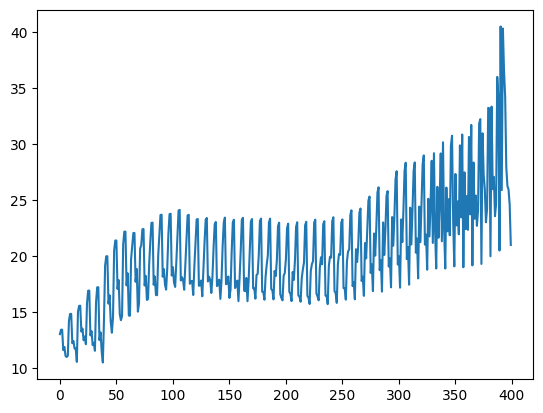

In [38]:
ecodf['Real-World MPG'].plot()

#### How can we improve this?

1. It looks like we're indexing this by integers (the x-axis).  A more helpful view would be years (or dates).
2. From the dataset above, all vehicle types are being plotted (so there are multiple values corresponding to each year).  Try plotting only for the vehicle type `Car SUV`, for example.
3. The plot needs **labels** (axes, legend) and improved formatting (look, size, font).

#### (1) formatting the dates

Let's format the `Model Year` column and set it as our index.

In [39]:
ecodf

,Model Year,Regulatory Class,Vehicle Type,Production Share,Real-World MPG,Real-World MPG_City,Real-World MPG_Hwy,Real-World CO2 (g/mi),Real-World CO2_City (g/mi),Real-World CO2_Hwy (g/mi),Weight (lbs),Horsepower (HP),Footprint (sq. ft.)
0,1975,All,All,1.000000,13.05970,12.01552,14.61167,680.59612,739.73800,608.31160,4060.399,137.3346,-
1,1975,Car,All Car,0.806646,13.45483,12.31413,15.17266,660.63740,721.82935,585.84724,4057.494,136.1964,-
2,1975,Car,Sedan/Wagon,0.805645,13.45833,12.31742,15.17643,660.46603,721.63673,585.70185,4057.565,136.2256,-
3,1975,Truck,All Truck,0.193354,11.63431,10.91165,12.65900,763.86134,814.45060,702.03002,4072.518,142.0826,-
4,1975,Truck,Pickup,0.131322,11.91476,11.07827,13.12613,745.88139,802.20090,677.04643,4011.977,140.9365,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Prelim. 2024,All,All,-,27.96500,25.09815,30.60087,305.40889,341.59863,278.11420,4419.473,266.6851,51.61607
396,Prelim. 2024,Truck,Minivan/Van,-,26.29519,22.74947,29.79890,332.37341,383.27762,293.97200,4736.531,260.6638,57.04549
397,Prelim. 2024,Truck,Truck SUV,-,25.95934,23.42193,28.26972,332.70975,368.52787,305.68907,4577.821,264.8282,50.22476
398,Prelim. 2024,Truck,All Truck,-,24.60905,22.12403,26.88731,352.70553,392.50003,322.68511,4774.982,284.0950,54.02956


In [40]:
pd.to_datetime(ecodf['Model Year'], format='%Y')

ValueError: time data "Prelim. 2024" doesn't match format "%Y", at position 49. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

Since the most recent data is marked as preliminary, it's a string that isn't being recognized as a year.
We'll have to work around that manually.

In [41]:
'Prelim. 2024'.split()[-1]

'2024'

In [43]:
def f(t):
    if 'Prelim.' in t:
        t = t.split(' ')[-1]
    return t

ecodf['Model Year'] = ecodf['Model Year'].apply(f)
ecodf['Model Year'] = pd.to_datetime(ecodf['Model Year'], format='%Y')

In [44]:
ecodf.set_index('Model Year', inplace=True)
ecodf

,Regulatory Class,Vehicle Type,Production Share,Real-World MPG,Real-World MPG_City,Real-World MPG_Hwy,Real-World CO2 (g/mi),Real-World CO2_City (g/mi),Real-World CO2_Hwy (g/mi),Weight (lbs),Horsepower (HP),Footprint (sq. ft.)
Model Year,,,,,,,,,,,,
1975-01-01,All,All,1.000000,13.05970,12.01552,14.61167,680.59612,739.73800,608.31160,4060.399,137.3346,-
1975-01-01,Car,All Car,0.806646,13.45483,12.31413,15.17266,660.63740,721.82935,585.84724,4057.494,136.1964,-
1975-01-01,Car,Sedan/Wagon,0.805645,13.45833,12.31742,15.17643,660.46603,721.63673,585.70185,4057.565,136.2256,-
1975-01-01,Truck,All Truck,0.193354,11.63431,10.91165,12.65900,763.86134,814.45060,702.03002,4072.518,142.0826,-
1975-01-01,Truck,Pickup,0.131322,11.91476,11.07827,13.12613,745.88139,802.20090,677.04643,4011.977,140.9365,-
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,All,All,-,27.96500,25.09815,30.60087,305.40889,341.59863,278.11420,4419.473,266.6851,51.61607
2024-01-01,Truck,Minivan/Van,-,26.29519,22.74947,29.79890,332.37341,383.27762,293.97200,4736.531,260.6638,57.04549
2024-01-01,Truck,Truck SUV,-,25.95934,23.42193,28.26972,332.70975,368.52787,305.68907,4577.821,264.8282,50.22476


<Axes: xlabel='Model Year'>

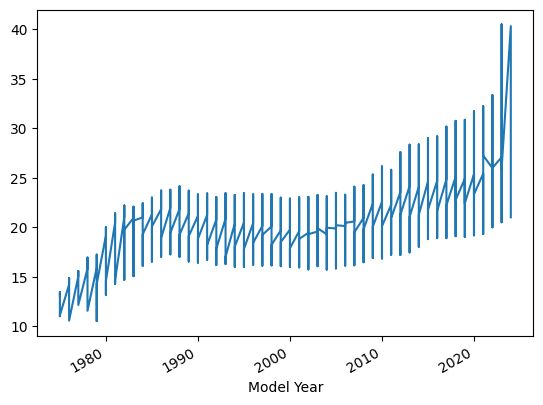

In [45]:
ecodf['Real-World MPG'].plot()

#### (2)

We still have multiple vehicle types being plotted for each year (the large oscillating pattern).
Now check to see where the `Vehicle Type` is equal to `Car SUV` and only plot that data.

<Axes: xlabel='Model Year'>

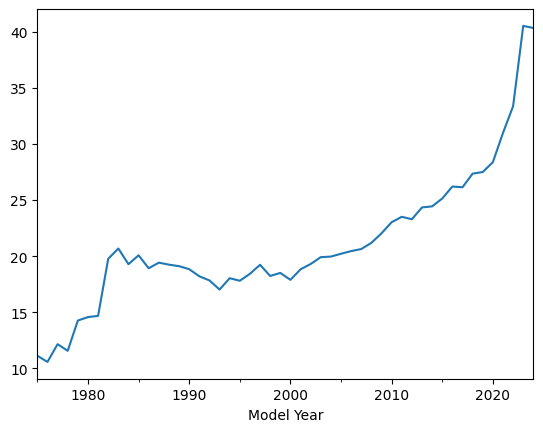

In [46]:
ecodf[
ecodf['Vehicle Type']=='Car SUV'
]['Real-World MPG'].plot()

#### (3)

Note that changing the index automatically applied the index column label as the x-axis label.

But, there's still a lot we can do to improve the plot with more labels and other
visual formatting changes.

First, we'll adjust the image size, add axis labels/legend, and make the line thicker.


Text(0, 0.5, 'Miles Per Gallon')

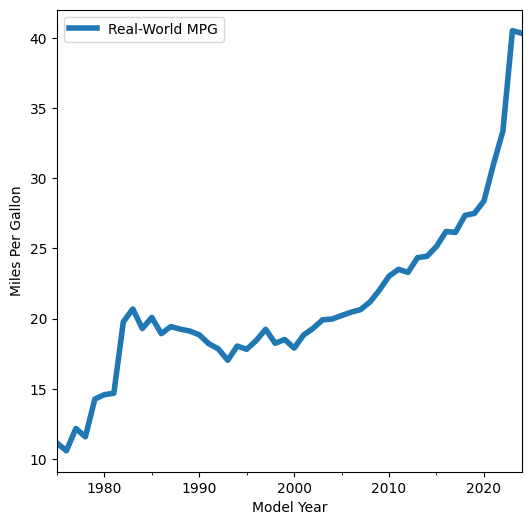

In [47]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()

ecodf[
    ecodf['Vehicle Type']=='Car SUV'
]['Real-World MPG'].plot(ax=ax, linewidth=4)

ax.legend()
plt.ylabel('Miles Per Gallon')

We can also change the fontsize and the general look.

https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html

Text(0.5, 0, 'Year')

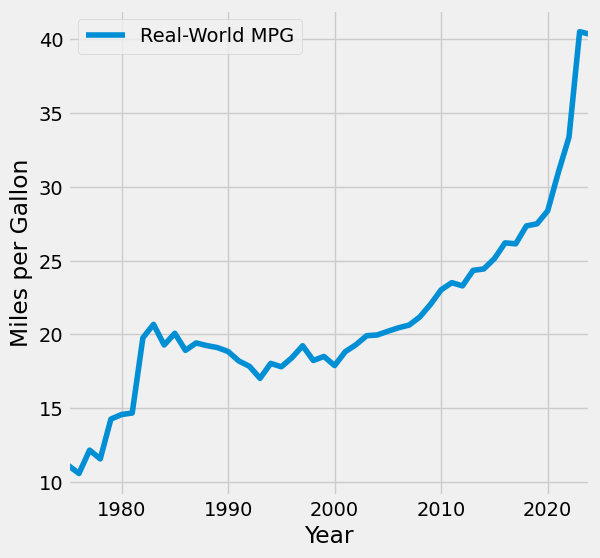

In [48]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(6,6))
ax = fig.gca()

ecodf[
    ecodf['Vehicle Type']=='Car SUV'
]['Real-World MPG'].plot(ax=ax, linewidth=4)

ax.legend()
plt.ylabel('Miles per Gallon')
plt.xlabel('Year')

The data has a lot of small variation that can make it
harder to see the overall trend.  Let's plot smoothed
data from a rolling average
by combining the Pandas series functions `.rolling()` and `.mean()`.

Text(0.5, 0, 'Year')

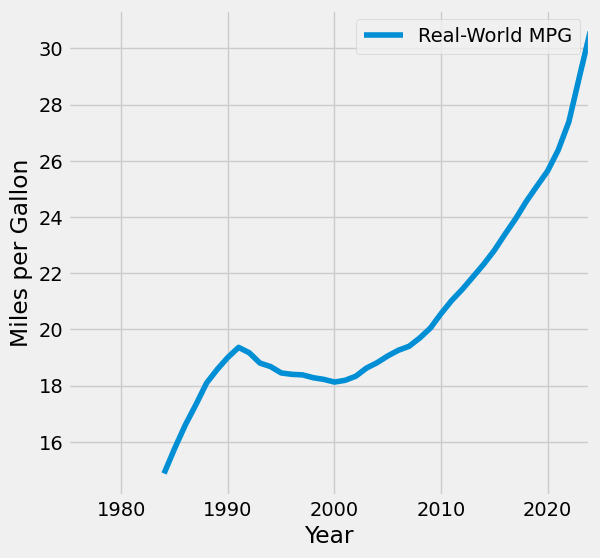

In [49]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(6,6))
ax = fig.gca()

ecodf[
    ecodf['Vehicle Type']=='Car SUV'
]['Real-World MPG'].rolling(10).mean().plot(ax=ax, linewidth=4)

ax.legend()
plt.ylabel('Miles per Gallon')
plt.xlabel('Year')

## 2. Your turn, the fuel prices dataset

The goal of this portion of the notebook is to construct a correlation between **fuel prices** and **fuel efficiency**.  We've already imported and formatted the fuel efficiency dataset, but you'll be starting from the original .csv for the fuel prices dataset.

To do this consider the following challenge questions:

1. How do you format the fuel price data with a `datetime` index?  It may be helpful to distinguish between monthly values and yearly averages (the yearly averages end in "13" for this dataset).

2. How should you handle missing data in the `Value` column?

3. Do you see a trend in regular unleaded gas prices? (the column is `RUUCUUS` for regular unleaded gas)

4. Find a correlation between the **fuel price** and **fuel efficiency**.  To do this you may want to combine the relevant values from the different dataframes using `pd.merge_asof()` and then use the function `.corr()` on the combined dataframe.

5. Try to plot the **fuel price** and **fuel efficiency** on the same plot, but with different y-axis scales -- do you observe a correlation?

6. Plot **fuel price** and **fuel efficiency** using a rolling average, for example `rolling(5).mean()` on a Pandas series to display a 5 year rolling average.  See above for an example of rolling average.  Plot the rolling averages like you plotted the values in the previous question.

5. (*) Use seaborn's `jointplot()` to plot MPG vs Price to deduce a correlation.  `import seaborn as sns`

### Getting started

First import the data

In [50]:
pricedf = pd.read_csv('MER_T09_04.csv')
pricedf

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,RLUCUUS,194913,0.268,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes
1,RLUCUUS,195013,0.268,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes
2,RLUCUUS,195113,0.272,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes
3,RLUCUUS,195213,0.274,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes
4,RLUCUUS,195313,0.287,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes
...,...,...,...,...,...,...
5595,DFONUUS,202409,3.558,8,On-Highway Diesel Fuel Price,Dollars per Gallon Including Taxes
5596,DFONUUS,202410,3.585,8,On-Highway Diesel Fuel Price,Dollars per Gallon Including Taxes
5597,DFONUUS,202411,3.522,8,On-Highway Diesel Fuel Price,Dollars per Gallon Including Taxes
5598,DFONUUS,202412,3.494,8,On-Highway Diesel Fuel Price,Dollars per Gallon Including Taxes


Next, do two things:

1. Make a column called `Data Type` and mark it as `AVG` if the year string contains a `13`.
2. For each row that's an `AVG`, format the year string in one way.

In [53]:
#clear
def f(x):
    x = str(x)
    if x[-2:] == '13':
        return 'AVG'
    else:
        return ''
pricedf['Data Type'] = pricedf['YYYYMM'].apply(f)

def f(x):
    y = str(x['YYYYMM'])
    if x['Data Type'] == 'AVG':
        return pd.to_datetime(y[:4], format='%Y')
    else:
        return pd.to_datetime(y, format='%Y%m')

pricedf['Date'] = pricedf.apply(f, axis=1)

Now check to see what all of the `AVG` `Value` numbers look like.

You might want to revisit how we looked at the `Car SUV` values above.

In [54]:
#clear
a = pricedf[
    pricedf['Data Type'] == 'AVG'
]['Value']

print(type(a.loc[0]))
print(a)

<class 'str'>
0       0.268
1       0.268
2       0.272
3       0.274
4       0.287
        ...  
5547    2.551
5560    3.287
5573    4.989
5586    4.214
5599     3.76
Name: Value, Length: 608, dtype: object


For the next step you'll want to

1. try to convert a number to a float
2. if the convertion doesn't work, then use not-a-number (`np.nan`)

In [55]:
a = 'mystring'
b = 5
c = 7.7
print(type(a))
print(type(b))
print(type(c))
np.nbytes

<class 'str'>
<class 'int'>
<class 'float'>


{numpy.bool_: 1,
 numpy.int8: 1,
 numpy.uint8: 1,
 numpy.int16: 2,
 numpy.uint16: 2,
 numpy.int32: 4,
 numpy.uint32: 4,
 numpy.int64: 8,
 numpy.uint64: 8,
 numpy.longlong: 8,
 numpy.ulonglong: 8,
 numpy.float16: 2,
 numpy.float32: 4,
 numpy.float64: 8,
 numpy.longdouble: 16,
 numpy.complex64: 8,
 numpy.complex128: 16,
 numpy.clongdouble: 32,
 numpy.object_: 8,
 numpy.bytes_: 0,
 numpy.str_: 0,
 numpy.void: 0,
 numpy.datetime64: 8,
 numpy.timedelta64: 8}

In [56]:
try:
    a = 1/0
except:
    print('oops, division by zero')

oops, division by zero


In [57]:
#clear
try:
    y = float('1.23')
except:
    print('this should not print')
print(f'y={y}')

try:
    y = float('trace')
except:
    y = np.nan
    print('converted to nan')

print(f'y={y}')

y=1.23
converted to nan
y=nan


Try using both the fuel average `AVG` and the vehicle `RLUCUUS`

Here's a reminder:

In [58]:
mydf.info()
mydf[
    (mydf['temperature'] == 20)
    &
    (mydf['snowfall'] == 12.5)
]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2019-01-01 to 2019-03-01
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  3 non-null      int64  
 1   snowfall     3 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 72.0 bytes


,temperature,snowfall
month,,
2019-01-01,20,12.5


In [61]:
#clear
pricedf[
    (pricedf['Data Type'] == 'AVG')
    &
    (pricedf['MSN'] == 'RLUCUUS')
][['Date','Value']]

,Date,Value
0,1949-01-01,0.268
1,1950-01-01,0.268
2,1951-01-01,0.272
3,1952-01-01,0.274
4,1953-01-01,0.287
...,...,...
647,2020-01-01,Not Applicable
660,2021-01-01,Not Applicable
673,2022-01-01,Not Applicable
686,2023-01-01,Not Applicable


 Plot the leaded and unleadded: `RLUCUUS` and `RUUCUUS`

TypeError: no numeric data to plot

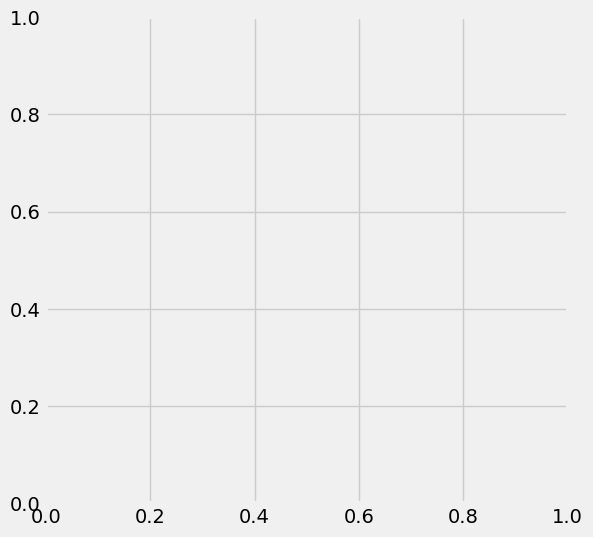

In [70]:
#clear
fig = plt.figure(figsize=(6,6))
ax = fig.gca()

pricedf[
    (pricedf['Data Type'] == 'AVG')
    &
    (pricedf['MSN'] == 'RLUCUUS')
].plot(x='Date', y='Value', ax=ax, label='leaded')

pricedf[
    (pricedf['Data Type'] == 'AVG')
    &
    (pricedf['MSN'] == 'RUUCUUS')
].plot(x='Date', y='Value', ax=ax, label='unleaded')

Make a new data frame (say `df1`) for unleaded and set the `Date` as the index

In [71]:
#clear
df1 = pricedf[
    (pricedf['Data Type'] == 'AVG')
    &
    (pricedf['MSN'] == 'RUUCUUS')
][['Date','Value']]

df1.set_index('Date', inplace=True)
df1

,Value
Date,
1949-01-01,Not Available
1950-01-01,Not Available
1951-01-01,Not Available
1952-01-01,Not Available
1953-01-01,Not Available
...,...
2020-01-01,2.174
2021-01-01,3.051
2022-01-01,4.094


Now plot the values and the rolling mean (say every 4 years as an example)

TypeError: no numeric data to plot

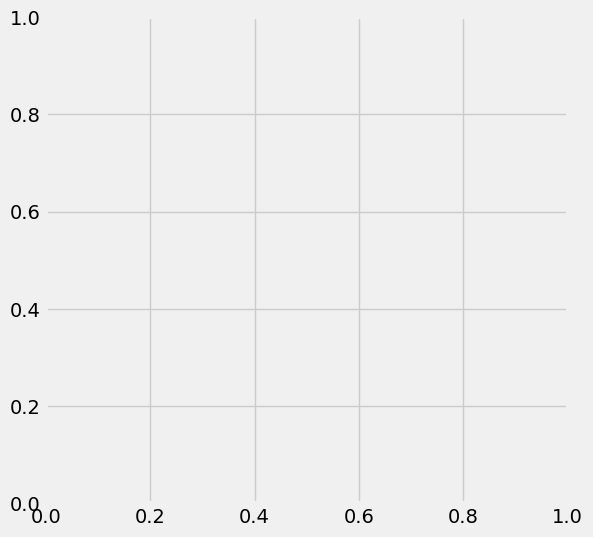

In [81]:
#clear
fig = plt.figure(figsize=(6,6))
ax = fig.gca()

df1.plot(ax=ax)
df1.rolling(4).mean().plot(ax=ax)

At this point, we have a dataframe `df1` with the average price per gallon.

Next, create a new data frame (say `df0`) for the `Real-World MPG` for `All Car` types:

In [73]:
#clear
df1 = pricedf[
    (pricedf['Data Type'] == 'AVG')
    &
    (pricedf['MSN'] == 'RUUCUUS')
][['Date','Value']]

df1.set_index('Date', inplace=True)
df1

,Value
Date,
1949-01-01,Not Available
1950-01-01,Not Available
1951-01-01,Not Available
1952-01-01,Not Available
1953-01-01,Not Available
...,...
2020-01-01,2.174
2021-01-01,3.051
2022-01-01,4.094


Now use `pdf.merge_asof`, paying close attention to `left_index`, `right_index`, and `direction`.

This should make a new data frame:

In [75]:
#clear
df0 = ecodf[
    (ecodf['Vehicle Type']=='All Car')
][['Real-World MPG']]

df0

,Real-World MPG
Model Year,
1975-01-01,13.45483
1976-01-01,14.86139
1977-01-01,15.58566
1978-01-01,16.93760
1979-01-01,17.24016
1980-01-01,20.01181
1981-01-01,21.41607
1982-01-01,22.20740
1983-01-01,22.08496


In [76]:
#clear
dfboth = pd.merge_asof(df0, df1, left_index=True, right_index=True, direction='nearest')

<Axes: xlabel='Model Year'>

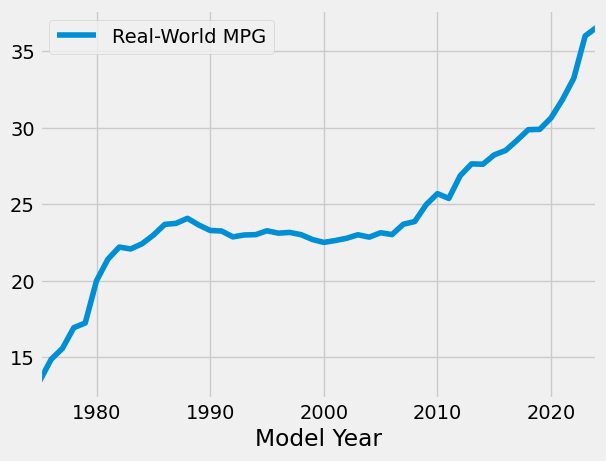

In [78]:
#clear
dfboth.plot()

Now plot the rolling mean and try to use two axis (a secondary `y`) for the MPG and the price of gas.

DataError: No numeric types to aggregate

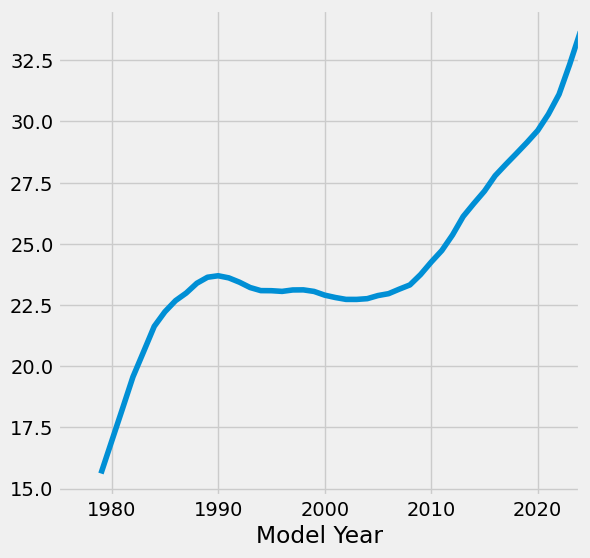

In [79]:
#clear
fig = plt.figure(figsize=(6,6))
ax = fig.gca()

ax1 = dfboth['Real-World MPG'].rolling(5).mean().plot(label='MPG')
ax2 = dfboth['Value'].rolling(5).mean().plot(label='Gas Price', secondary_y=True)

ax1.legend(loc=2)
ax2.legend(loc=1)

Challenge problem: find the correlation and use `jointplot`

In [80]:
from io import StringIO
data = \
"""
1 apple    5.50
8 banana 3.00
4 coffee 20.25
- bagel -
"""
df = pd.read_csv(StringIO(data), sep="\s+", names=['quantity', 'name', 'amount'])

def f(x):
    print(type(x))
df['name'].apply(f)

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


,name
0,None
1,None
2,None
3,None
